<a href="https://colab.research.google.com/github/Aleksandr62aa/Automatic-Number_Plate_Recognition/blob/main/Number_plate_recognition_Haarcascade_easyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Automatic number plate recognition**

**Haarcascade + Easyocr**

**Algorithm:**

1.Search for a number plate

2.Normalizing numbers plate

3.Recognising text for a number plate

In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.8 MB/s eta 0:00:00


In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import cv2
import easyocr

In [4]:
# load a image
carplate_img = cv2.imread('car1.jpg')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

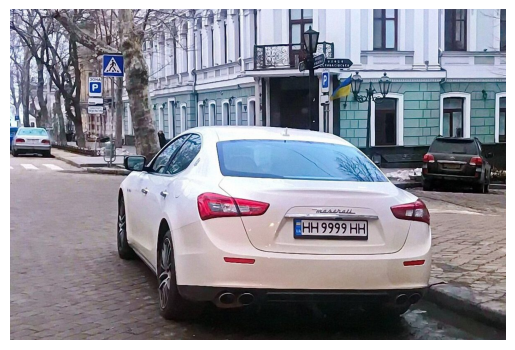

In [5]:
def show_img(img, cmap = None, axis = False):
    plt.imshow(img, cmap=cmap)
    plt.axis(axis)
    plt.show()

show_img(carplate_img_rgb)

**1.Search for a number plate**

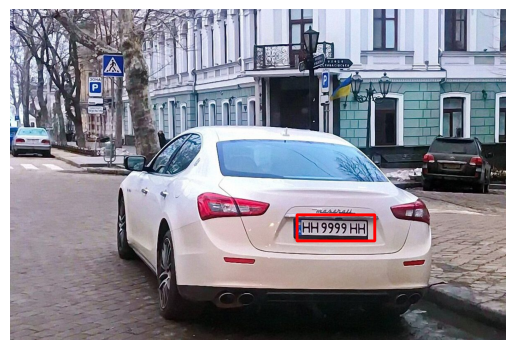

In [8]:
def carplate_detect(image, carplate_rects):
    carplate_overlay = image.copy()
    for x,y,w,h in carplate_rects:
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255, 0, 0), 5)
    return carplate_overlay

carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_plate_number.xml')
carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_img_rgb,scaleFactor=1.1, minNeighbors=3)
detected_carplate_img = carplate_detect(carplate_img_rgb, carplate_rects)
show_img(detected_carplate_img)

**2.Normalizing numbers plate**

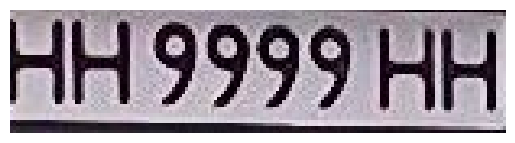

In [9]:
def carplate_extract(image, carplate_rects):
    for x,y,w,h in carplate_rects:
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20]
    return carplate_img

carplate_extract_img = carplate_extract(carplate_img_rgb, carplate_rects)
show_img(carplate_extract_img)

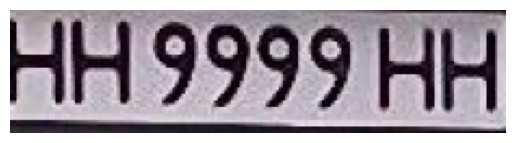

In [10]:
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] *scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

carplate_extract_img = enlarge_img(carplate_extract_img, 150)
show_img(carplate_extract_img)

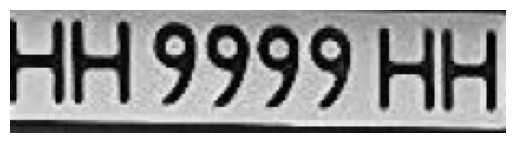

In [11]:
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
show_img(carplate_extract_img_gray, cmap = 'gray')

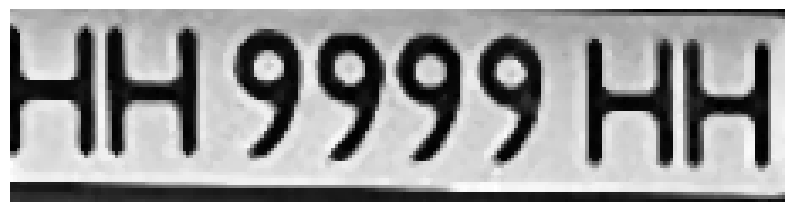

In [157]:
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3)
show_img(carplate_extract_img_gray_blur, cmap = 'gray')

**3.Recognising text for a number plate**

In [16]:
reader=easyocr.Reader(['en'])
result=reader.readtext(carplate_extract_img_gray)
carplate_text = ""
for res in result:
    if len(result) == 1 or (len(res[1]) > 6 and res[2] > 0.2):
        carplate_text = res[1]
        carplate_text = str(carplate_text).rstrip()

print(carplate_text, sep = '\n')

HH9999 HH


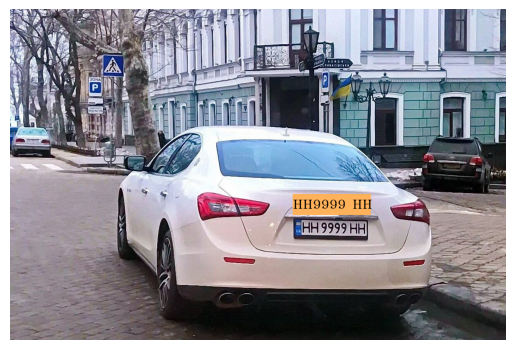

In [14]:
for x,y,w,h in carplate_rects:
        cv2.rectangle(carplate_img_rgb, (x-10,y-50), (x+w-10,y), (255, 178, 90), -1)
        cv2.putText(carplate_img_rgb,carplate_text, (x-10, y-15), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (0, 0, 0), 1)
show_img(carplate_img_rgb)

In [17]:
filename = 'car_Haarcascade_easyOCR.jpg'
carplate_img_bgr = cv2.cvtColor(carplate_img_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite(filename, carplate_img_bgr)

True